#### Exploratoy Data Analysis (EDA)

#### 1. Importando as bibliotecas 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Realizando a leitura do arquivo "business_EDITED.csv" e criando o dataset 

In [6]:
# Criando o dataset e exibindo uma amostra do mesmo

# Definindo uma variável com o caminho para os arquivos JSON
path = os.path.abspath('..') + '\\INPUT'

# Realizando a leitura do arquivo "business_EDITED.csv" e criando o dataset
business = pd.read_csv(path + '\\business_EDITED.csv').drop('Unnamed: 0', axis=1)

# Exibindo as primeiras linhas do dataset para confirmar se o arquivo foi lido corretamente
business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,hours_None,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,hours_Sunday,le_city,le_state
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,1,0,0,0,0,0,0,0,1007,2
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,0,1,1192,1177,1234,1296,1171,0,6,13
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,0,1115,1205,1191,1249,1315,1205,1111,1210,1


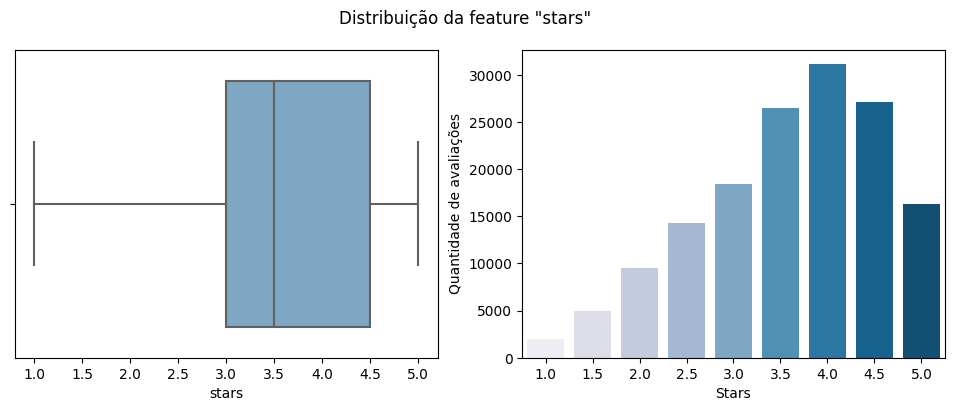

In [7]:
# Verificando a distribuição da feature 'stars' (que será o target do nosso futuro modelo)

stars = business['stars'].agg('value_counts')

fig, ax = plt.subplots(1,2, figsize=[12,4])

sns.boxplot(ax=ax[0],
            data=business,
            x='stars',
            palette='PuBu'
           )

sns.barplot(ax=ax[1],
            x=stars.index,
            y=stars,
            palette='PuBu'
           )

fig.suptitle('Distribuição da feature "stars"')
ax[1].set_xlabel('Stars')
ax[1].set_ylabel('Quantidade de avaliações')
plt.show()

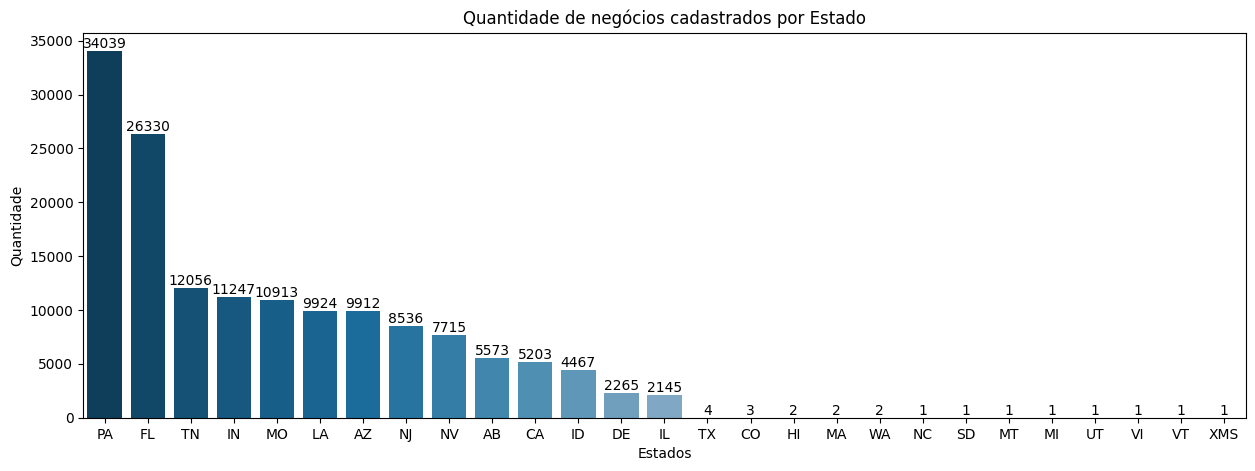

In [21]:
# Criando um Dataframe contendo a quantidade TOTAL de negócios (abertos e fechados) agrupados por Estado

df_total_business = business[['state','is_open']].groupby('state').sum()
df_total_business['total'] = business[['state','is_open']].groupby('state').count()
df_total_business = df_total_business.sort_values(by='total', ascending=False).reset_index()

# Plotando o gráfico contendo os Estados que possuem a maior quantidade de negócios cadastrados

fig, ax = plt.subplots(figsize=[15,5])

ax = sns.barplot(x=df_total_business['state'],
                 y=df_total_business['total'],
                 palette='PuBu_r'
                )
for i in ax.containers:
    ax.bar_label(i,)

ax.set(xlabel='Estados',
       ylabel='Quantidade',
       title='Quantidade de negócios cadastrados por Estado'
      )
plt.show()

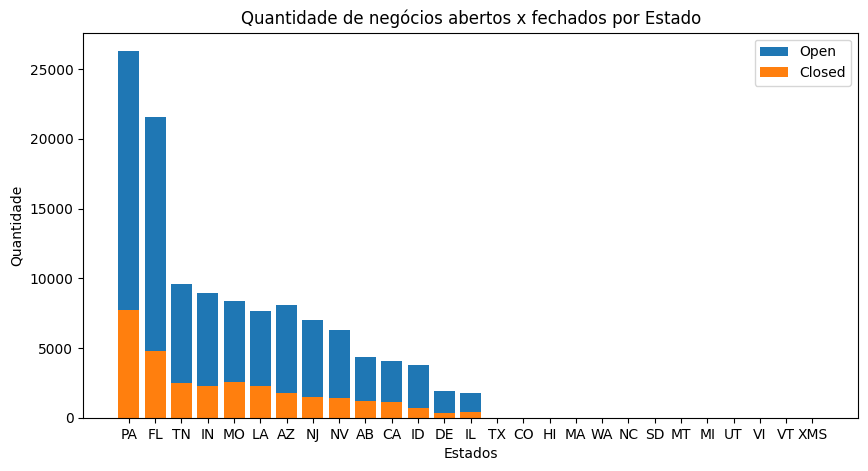

In [16]:
# Plotando o gráfico com a diferença entre negócios abertos x fechados por Estado

fig, ax = plt.subplots(figsize=[10,5])

plt.bar(x=df_total_business['state'], height=df_total_business['is_open'])
plt.bar(x=df_total_business['state'], height=(df_total_business['total'] - df_total_business['is_open']))

ax.set(xlabel='Estados',
       ylabel='Quantidade',
       title='Quantidade de negócios abertos x fechados por Estado'
      )
      
plt.legend(['Open','Closed'])
plt.show()

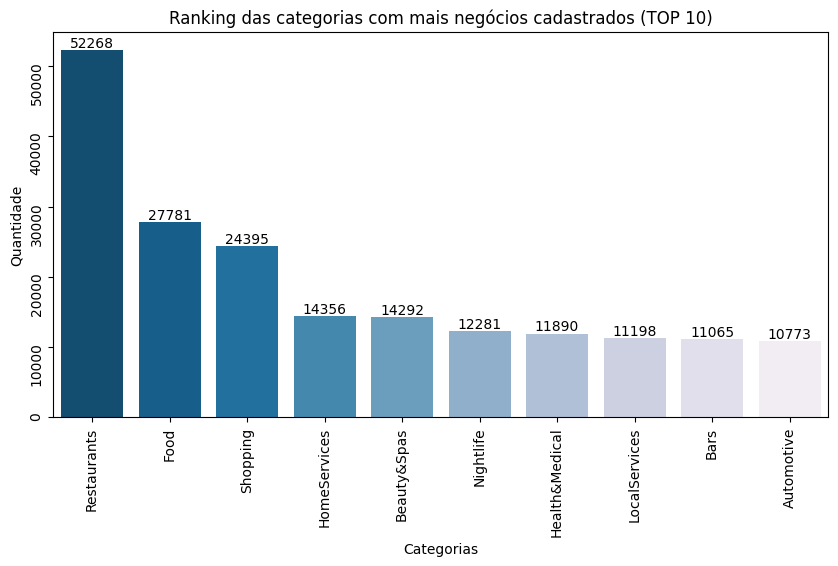

In [15]:
# Criando um Dataframe contendo as categorias e a quantidade de negócios presentes em cada uma delas
cat_dict = {}

for feature in business:
    if 'category' in feature:
        new_feature = feature.replace('category_','')
        cat_dict[new_feature] = business[feature].value_counts()[1]

df = pd.DataFrame.from_dict(cat_dict, orient='index').reset_index()
df = df.rename({'index':'categories', 0:'qty'}, axis=1)
df = df.sort_values(by='qty', ascending=False).reset_index(drop=True).head(10)

# Plotando o gráfico das categorias com mais negócios cadastrados

fig, ax = plt.subplots(figsize=[10,5])

ax = sns.barplot(x=df['categories'],
                 y=df['qty'],
                 palette='PuBu_r'
                )
for i in ax.containers:
    ax.bar_label(i,)

ax.set(xlabel='Categorias',
       ylabel='Quantidade',
       title='Ranking das categorias com mais negócios cadastrados (TOP 10)'
      )

ax.tick_params(rotation=90)

plt.show()